## Bellabeat Analysis - A case study


### Intro

Bellabeat is a high-tech company that manufactures health-focused smart products for women. The company has invested in traditional advertising media, but focus on digital marketing extensively. Now, they are looking for more opportunities to growth using public datasets for build a data driven startegy.

### Business Task

Identify the trends by Analyze the usage of fitness device and provide the recommendations for new marketing strategy and Business improvement strategy from the results.

### Analyze Data - Steps
* Ask
* Prepare
* Process
* Analyze
* Share
* Act

#### Ask 

To construct my recommendations, I'll start defining the main questions to guide this analysis:
* What are some trends in smart device usage?
* How could thesse trends apply to Bellabeat customers?
* How could these trends help influence Bellabeat marketing strategy?

#### Prepare
Now, using the FitBit Fitness Tracker Data, a public dataset stored in Kaggle, that contains personal fitness tracker from thirty fitbit users and aviable through Mobius, we can explore and find some trends about the users habbits. This datset provides data about physical activity, heart rate, sleep monitoring and daily activty steps.  

Lets check out the data

Data source : https://www.kaggle.com/arashnic/fitbit This data set contains 18 csv files.

In [1]:
##carregando pacote tidyverse

library(tidyverse)
library(lubridate)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
##importando as tabelas

dailyActivity_merged <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv") #Atividades Diárias
glimpse(dailyActivity_merged)

Rows: 940
Columns: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/…
$ TotalSteps               <int> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <int> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <int> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

#### Process
##### Cleaning Data

Here we'll check, clean and organize the data. This step allows us to identify trends in the Analyze step.

In [3]:
bd <- dailyActivity_merged %>% 
                    mutate(Id = as.factor(Id))%>%
                 rename(Date = ActivityDate)%>%
                 drop_na()   
glimpse(bd)

Rows: 940
Columns: 15
$ Id                       <fct> 1503960366, 1503960366, 1503960366, 150396036…
$ Date                     <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/…
$ TotalSteps               <int> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <int> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <int> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

In [4]:
# Transformando as datas no formato adequado

bd$Date <- as.Date(bd$Date, origin = "1899-12-30", tryFormats = c("%m/%d/%Y"))

glimpse(bd)


Rows: 940
Columns: 15
$ Id                       <fct> 1503960366, 1503960366, 1503960366, 150396036…
$ Date                     <date> 2016-04-12, 2016-04-13, 2016-04-14, 2016-04-…
$ TotalSteps               <int> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <int> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <int> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

Para entendermos melhor o comportamento dos usuários, dividimos o período de trinta dias de  registro em 3 ciclos de dez dias cada. Dessa forma será possível segmentar os usuários de acordo com status de completude de cada ciclo. O status de completude de cada ciclo é determinado pelo total de dias de atividade física registrados.

In [5]:
# Categorizando os usuários por número de dias de atividade
bd_statusciclo <- bd %>% group_by(Id)%>%
    summarize(datareg_inicio = min(Date), datareg_fim = max(Date))%>%
    mutate(num_dias = (datareg_fim - datareg_inicio), datafim_primeiro_ciclo = datareg_inicio + 9, 
           datainicio_segundo_ciclo = datareg_inicio + 10,datafim_segundo_ciclo = datareg_inicio + 19,
          datainicio_terceiro_ciclo = datareg_inicio + 20,
          status_ciclo = as.factor(case_when(
                                  num_dias < 10 ~ "1º Ciclo incompleto",
                                  num_dias == 10 ~ "1º Ciclo completo",
                                  num_dias %in% c(11:19) ~ "2º Ciclo incompleto",
                                  num_dias == 20 ~ "2º Ciclo completo",
                                  num_dias %in% c(21:29) ~ "3º Ciclo incompleto",
                                  num_dias == 30 ~ "3º Ciclo completo")))

In [6]:
# Selecionando IDs que não alcançaram a meta, ou seja, possuem algum ciclo incompleto.
id_metainc <- bd_statusciclo %>% filter (status_ciclo %in% c("1º Ciclo incompleto","2º Ciclo incompleto", "3º Ciclo incompleto")) %>%
                        select(Id) 
                        

#Selecionando IDs que alcançaram a meta completando os três ciclos
id_metacomp <- bd_statusciclo %>% filter (status_ciclo == "3º Ciclo completo") %>%
                        select(Id)

É importante identificar na tabela geral de registros, a qual ciclo pertence cada uma das atividades inseridas. Essa identificação é feita a partir da data em que a atividade foi registrada 

In [7]:
#criando os intervalos de data que definem inicio e fim de cada ciclo
periodo_primeirociclo <- seq.Date(from = dmy("12-04-2016"), to = dmy("21-04-2016"), by = "day")
periodo_segundociclo <- seq.Date(from = dmy("22-04-2016"), to = dmy("01-05-2016"), by = "day")
periodo_terceirociclo <- seq.Date(from = dmy("02-05-2016"), to = dmy("12-05-2016"), by = "day")

In [8]:
bdfin <- bd %>% mutate(Ciclo = case_when(
                                Date %in% periodo_primeirociclo ~ "1º Ciclo",
                                Date %in% periodo_segundociclo ~ "2º Ciclo",
                                Date %in% periodo_terceirociclo ~ "3º Ciclo"))
glimpse(bdfin)                       

Rows: 940
Columns: 16
$ Id                       <fct> 1503960366, 1503960366, 1503960366, 150396036…
$ Date                     <date> 2016-04-12, 2016-04-13, 2016-04-14, 2016-04-…
$ TotalSteps               <int> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <int> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <int> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

#### Analyze


Analisando os resultados dos usuários percebemos que, conforme mostrado no gráfico abaixo, cerca de 36% deles não completaram os 30 dias de atividade física diária. Esses números indicam uma dificuldade de manutenção do propósito de uma vida mais saudável, considerando a necessidade da realização de atividades físicas diariamente.

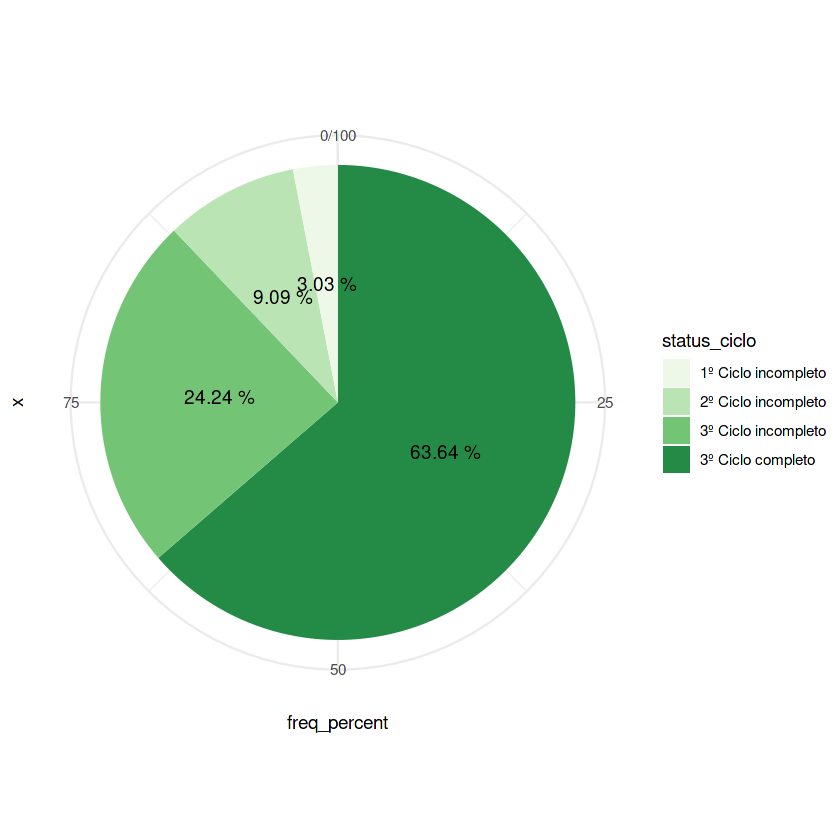

In [9]:
bd_statusciclo %>% group_by(status_ciclo)%>%
    summarise(freq = n())%>%
    mutate(freq_percent= as.numeric(round(100 *(freq/sum(freq)),2)), status_ciclo = fct_reorder(status_ciclo, freq_percent))%>%
    arrange(desc(freq_percent))%>%
ggplot(aes(x ="", y=freq_percent, fill=status_ciclo))+
geom_bar(width = 1, stat = "identity") +
coord_polar("y", start=0) + 
geom_text(aes(x ="", y=freq_percent, label = paste(freq_percent,"%")),
            position = position_stack(vjust = 0.5))+
scale_fill_brewer(palette="Greens")+
              theme_minimal()

Comparando os dois grupos, ou seja, usuários que completaram os três ciclos e os que não completaram, podemos perceber que a diferença entre as distâncias percorridas começam a se acentuar a partir do 2º Ciclo, resultando em uma diferença ainda maior no 3º Ciclo, em função da desistência em completar os 30 dias de atividade física.Como mostrado no gráfico abaixo:

`summarise()` has grouped output by 'status_meta'. You can override using the `.groups` argument.



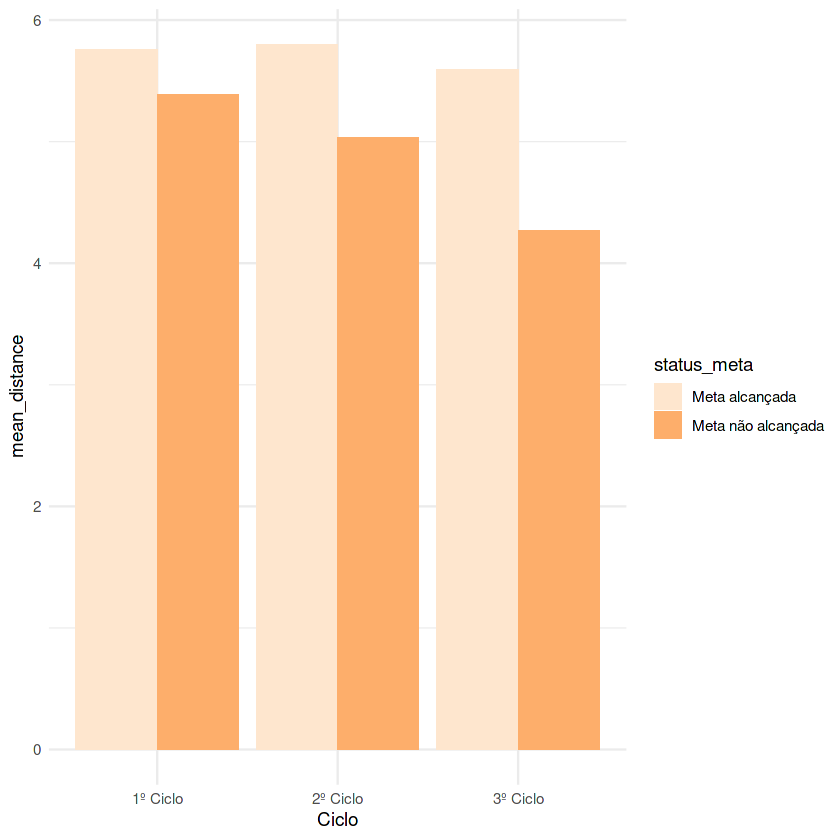

In [10]:
bdfin %>% mutate(status_meta = ifelse(Id %in% id_metainc$Id, "Meta não alcançada", "Meta alcançada")) %>%
    group_by(status_meta, Ciclo)%>%
    summarize(mean_distance = round(mean(TotalDistance),2)) %>%
ggplot(aes(x= Ciclo, y=mean_distance, fill = status_meta))+
geom_col(position = 'dodge')+
scale_fill_brewer(palette="Oranges")+
theme_minimal()
   

Como mostrado na tabela abaixo, a distância média percorrida no 2º Ciclo, pelos usuários que não atingiram a meta é cerca de 15% menor se comparado ao grupo  de usuários que atingiram a meta.

In [11]:
comp_ciclo_meta <- bdfin %>% mutate(status_meta = ifelse(Id %in% id_metainc$Id, "Meta não alcançada", "Meta alcançada")) %>%
    group_by(status_meta, Ciclo)%>%
    summarize(mean_distance = round(mean(TotalDistance),2))%>%
    arrange(Ciclo, status_meta)
knitr::kable(comp_ciclo_meta)

`summarise()` has grouped output by 'status_meta'. You can override using the `.groups` argument.





|status_meta        |Ciclo    | mean_distance|
|:------------------|:--------|-------------:|
|Meta alcançada     |1º Ciclo |          5.76|
|Meta não alcançada |1º Ciclo |          5.39|
|Meta alcançada     |2º Ciclo |          5.80|
|Meta não alcançada |2º Ciclo |          5.03|
|Meta alcançada     |3º Ciclo |          5.59|
|Meta não alcançada |3º Ciclo |          4.27|

### Recomendação
Como resultado da análise acima recomenda-se ações de retenção de usuários a partir do décimo primeiro dia de atividade física regular, considerando um ciclo de 30 dias.